# Assignment 03

In [1]:
using Plots
using GraphRecipes
using LinearAlgebra
using Random: seed!
using DelimitedFiles

In [2]:
I5 = ones(5, 1)

# Adjacency matrix for G1
G1 = [
    0 1 0 0 1;
    1 0 1 0 1;
    0 1 0 0 0;
    0 0 0 0 0;
    1 1 0 0 0
]

5×5 Array{Int64,2}:
 0  1  0  0  1
 1  0  1  0  1
 0  1  0  0  0
 0  0  0  0  0
 1  1  0  0  0

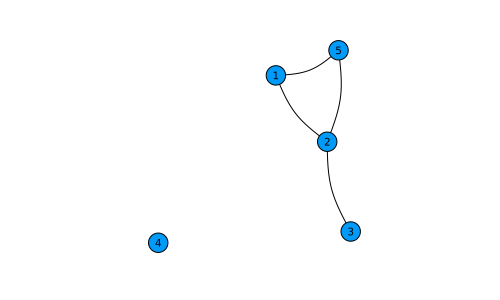

In [3]:
node_names = 1:5
graphplot(G1, names=node_names, curvature_scalar=0.04, nodeshape=:circle, markersize=0.2, shorten=0, dim=2)
plot!(size=(500, 300))

In [4]:
# The vector K whose elements are the degrees ki of the nodes
k = G1 * I5

5×1 Array{Float64,2}:
 2.0
 3.0
 1.0
 0.0
 2.0

In [5]:
# The number K of edges in the network
k' * I5 / 2

1×1 Array{Float64,2}:
 4.0

In [6]:
# The matrix B whose element b_ij is equal to the number of common neighbours
# of vertices i and j
G1 * G1

5×5 Array{Int64,2}:
 2  1  1  0  1
 1  3  0  0  1
 1  0  1  0  1
 0  0  0  0  0
 1  1  1  0  2

In [7]:
# The total number of triangles in the network
G1 ^ 3

5×5 Array{Int64,2}:
 2  4  1  0  3
 4  2  3  0  4
 1  3  0  0  1
 0  0  0  0  0
 3  4  1  0  2

In [8]:
# The total number of triangles in the network
tr(G1 ^ 3) / (2 * 3)

1.0

## Q3

**Def: degree of a node (undirected graph)**  
The degree $k_i$ of a node $i$ is defined as the number of edges *incident* to the node *i*.

**Def: degree of a node (directed graph)**  
For a directed graph the **in-degree** $k_i^\text{in}$ is the number of edges *incomming* to node $i$; the **out-degree** $k_i^\text{out}$ is the number of edges *outgoing* from node *i*.

**Def: degree sequence**  
In an undirected graph, the list of node degrees $\{k_1, k_2, \ldots, k_N\}$ is called the degree sequence

**Def: degree distribution**  
The node degree distribution of a graph $G$ is a discrete probability distribution taking integer values $k$ with the probability

$$
    p(k) = \frac{1}{N}\sum_{\{v \in \mathcal{V}\}} \mathbb{1}(k_v = k)
$$

In [9]:
G2 = [
    0 1 1 1 1 0;
    1 0 1 1 0 1;
    1 1 0 0 1 1;
    1 1 0 0 1 1;
    1 0 1 1 0 1;
    0 1 1 1 1 0;
]

6×6 Array{Int64,2}:
 0  1  1  1  1  0
 1  0  1  1  0  1
 1  1  0  0  1  1
 1  1  0  0  1  1
 1  0  1  1  0  1
 0  1  1  1  1  0

In [10]:
# degree sequence of the graph
sum(G2, dims=2)

6×1 Array{Int64,2}:
 4
 4
 4
 4
 4
 4

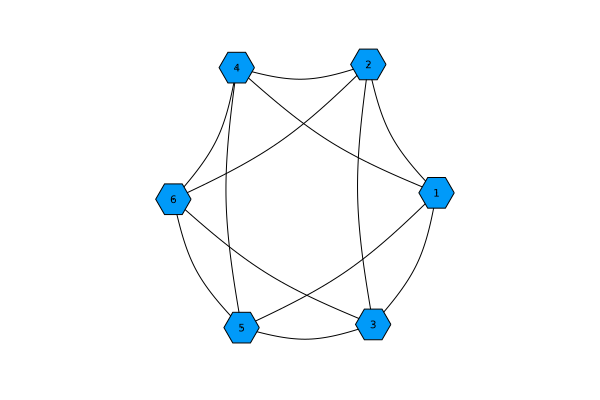

In [11]:
graphplot(G2, names=1:6, markersize=0.3)

In [12]:
1 4 2 1
1 3 2 1
1 5 3 1


LoadError: syntax: extra token "4" after end of expression

In [13]:
G2 ^ 3

6×6 Array{Int64,2}:
  8  12  12  12  12   8
 12   8  12  12   8  12
 12  12   8   8  12  12
 12  12   8   8  12  12
 12   8  12  12   8  12
  8  12  12  12  12   8

In [14]:
diag(G2 ^ 3) / 2

6-element Array{Float64,1}:
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0

In [15]:
# Checking whether the graph is irreducible => connected
all((I + G2) ^ (5) .> 0)

true

In [365]:
A = [
    0 1 0 1 0 0;
    0 0 1 0 0 0;
    0 0 0 0 1 0;
    0 1 0 0 0 1;
    1 0 0 0 0 1;
    0 0 1 0 0 0
]

N, N = size(A);

In [366]:
# Only works if graph is connected
shortest_path = Dict()
lenght = 1
got_all_paths = false

while !got_all_paths
    admissible_walks = map(Tuple, findall(x -> x >= 1, A ^ lenght))
    any_true = false
    for walk in admissible_walks
        if walk ∉ keys(shortest_path)
            shortest_path[walk] = lenght
            any_true = true
        end
    end
    lenght += 1
    got_all_paths = !any_true
end

shortest_path_matrix = zeros(N, N)
for r in 1:N
    for c in 1:N
        shortest_path_matrix[r, c] = shortest_path[r, c]
    end
end

shortest_path_matrix

In [368]:
sum(shortest_path_matrix) / (N * (N - 1))

2.933333333333333

In [318]:
admissible = map(Tuple, findall(x -> x == 1, A))
keyv = [(5,1), (1,2)]

Dict([v, 1] for v in admissible if v ∉ keyv)

Dict{Tuple{Int64,Int64},Int64} with 7 entries:
  (6, 3) => 1
  (2, 3) => 1
  (1, 4) => 1
  (5, 6) => 1
  (4, 6) => 1
  (4, 2) => 1
  (3, 5) => 1

In [306]:
(6,3) in keys(shortest_path)

true

In [273]:
A ^ 2

6×6 Array{Int64,2}:
 0  1  1  0  0  1
 0  0  0  0  1  0
 1  0  0  0  0  1
 0  0  2  0  0  0
 0  1  1  1  0  0
 0  0  0  0  1  0

# Bridges of könisberg

In [16]:
K = [
    0 0 1 1
    0 0 1 1
    1 1 0 1
    1 1 1 0
]

4×4 Array{Int64,2}:
 0  0  1  1
 0  0  1  1
 1  1  0  1
 1  1  1  0

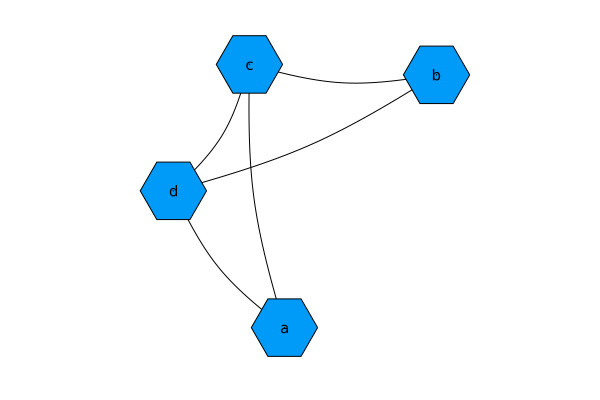

In [17]:
graphplot(K, names=["a" "b" "c" "d"], markersize=0.3, fontsize=10, seed=1)

In [18]:
[[1,1,2,2],[1,1,1],[1]]

3-element Array{Array{Int64,1},1}:
 [1, 1, 2, 2]
 [1, 1, 1]
 [1]

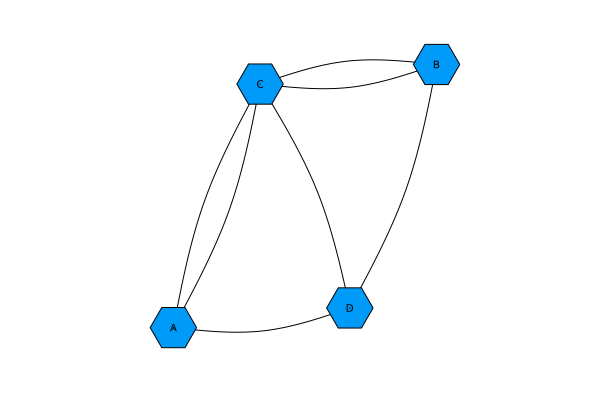

In [110]:
# A: 1
# B: 2
# C: 3
# D: 4

G = [
    [3, 4],
    [3, 4],
    [1, 2],
    [3],
]

seed!(3141)
graphplot(G, names=["A" "B" "C" "D"], markersize=0.3)

In [191]:
connections = Dict([
    ("A", ["C", "C", "D"]),
    ("B", ["C", "C", "D"]),
    ("C", ["A", "A", "B", "B", "D"]),
    ("D", ["A", "B", "C"]),
])

Dict{String,Array{String,1}} with 4 entries:
  "B" => ["C", "C", "D"]
  "A" => ["C", "C", "D"]
  "C" => ["A", "A", "B", "B", "D"]
  "D" => ["A", "B", "C"]

In [192]:
start_node = "A"

node = start_node
path = (node,)

connections[node]

3-element Array{String,1}:
 "C"
 "C"
 "D"

In [193]:
new_paths = []
for next_node in connections[node]
    update_path = (path..., next_node)
    append!(new_paths, [update_path])
    println(update_path)
end

("A", "C")
("A", "C")
("A", "D")


In [258]:
function get_next_step(path, connections)
    new_paths = []
    last_node = path[end]
    for next_node in connections[last_node]
        update_path = (path..., next_node)
        append!(new_paths, [update_path])
    end
    return new_paths
end


function get_paths(init_paths, connections)
    paths = init_paths[:]
    new_paths = []
    for path in paths
        new_paths_part = get_next_step(path, connections)
        append!(new_paths, new_paths_part)
    end
    paths = new_paths[:]
end

function find_walks(init_paths, connections, length_walk)
    paths = init_paths[:]
    for _ in 1:length_walk-1
        paths = get_paths(paths, connections)
    end
    return paths
end

paths = [("A",), ("B",), ("C",), ("D",)]
find_walks(paths, connections, 7)

9012-element Array{Any,1}:
 ("A", "C", "A", "C", "A", "C", "A")
 ("A", "C", "A", "C", "A", "C", "A")
 ("A", "C", "A", "C", "A", "C", "B")
 ("A", "C", "A", "C", "A", "C", "B")
 ("A", "C", "A", "C", "A", "C", "D")
 ("A", "C", "A", "C", "A", "C", "A")
 ("A", "C", "A", "C", "A", "C", "A")
 ("A", "C", "A", "C", "A", "C", "B")
 ("A", "C", "A", "C", "A", "C", "B")
 ("A", "C", "A", "C", "A", "C", "D")
 ("A", "C", "A", "C", "A", "D", "A")
 ("A", "C", "A", "C", "A", "D", "B")
 ("A", "C", "A", "C", "A", "D", "C")
 ⋮
 ("D", "C", "D", "C", "B", "D", "C")
 ("D", "C", "D", "C", "D", "A", "C")
 ("D", "C", "D", "C", "D", "A", "C")
 ("D", "C", "D", "C", "D", "A", "D")
 ("D", "C", "D", "C", "D", "B", "C")
 ("D", "C", "D", "C", "D", "B", "C")
 ("D", "C", "D", "C", "D", "B", "D")
 ("D", "C", "D", "C", "D", "C", "A")
 ("D", "C", "D", "C", "D", "C", "A")
 ("D", "C", "D", "C", "D", "C", "B")
 ("D", "C", "D", "C", "D", "C", "B")
 ("D", "C", "D", "C", "D", "C", "D")

## C.elegans

In [405]:
using LightGraphs

In [409]:
c_elegans_nodes = readdlm("../data/c_elegans/c_elegans_undir.net", Int64) .+ 1
N, = size(unique(c_elegans_nodes))
C = zeros(N, N)

for (from, to) in eachrow(c_elegans_nodes)
    C[from, to] = 1
    add_edge!(g, from, to)
end

In [410]:
g

{279, 2287} directed simple Int64 graph

In [411]:
global_clustering_coefficient(g)

0.03558016285273059

In [414]:
local_clustering_coefficient(g)

279-element Array{Float64,1}:
 0.125
 0.10173160173160173
 0.06403940886699508
 0.09239130434782608
 0.15555555555555556
 0.14705882352941177
 0.14285714285714285
 0.14705882352941177
 0.26666666666666666
 0.125
 0.12380952380952381
 0.11029411764705882
 0.06327985739750445
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

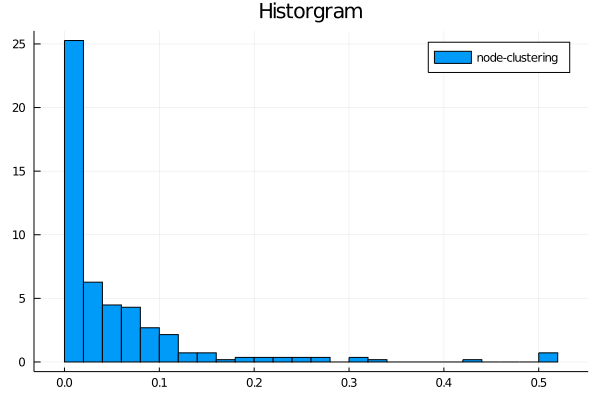

In [418]:
histogram(local_clustering_coefficient(g), label="node-clustering", normalize=true, title="Historgram")